In [111]:
import cv2
import numpy as np

In [112]:
from matplotlib import pyplot as plt

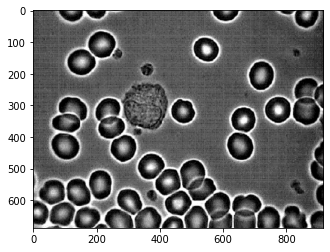

In [113]:
img = cv2.imread('cells.png', cv2.IMREAD_GRAYSCALE)

plt.imshow(img, cmap='gray')

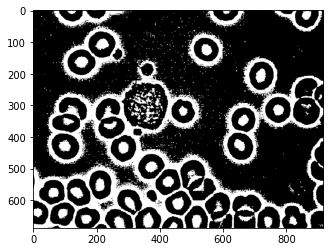

In [208]:
blur = cv2.blur(img, (5, 5))
binarised = cv2.threshold(img, 100.0, 255.0, cv2.THRESH_BINARY)[1]
plt.imshow(binarised, cmap='gray')

In [140]:
kernel_2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(2,2))
kernel_5 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))

36


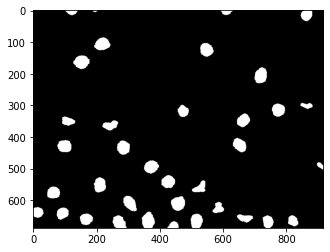

In [251]:
denoised = binarised.copy()
denoised = cv2.erode(denoised, kernel_5, iterations=1)
denoised = cv2.dilate(denoised, kernel_5, iterations=1)
denoised = cv2.floodFill(denoised, np.zeros((denoised.shape[0] + 2, denoised.shape[1] + 2), np.uint8), (0, 0), 255.0)[1]

denoised = cv2.dilate(denoised, kernel_5, iterations=2)
# denoised = cv2.erode(denoised, kernel_5, iterations=4)
# denoised = cv2.erode(denoised, kernel_2, iterations=1)
denoised = cv2.floodFill(denoised, np.zeros((denoised.shape[0] + 2, denoised.shape[1] + 2), np.uint8), (0, 0), 50.0)[1]

# denoised = cv2.erode(denoised, kernel_5, iterations=2)
# denoised = cv2.dilate(denoised, kernel_5, iterations=2)

mask=cv2.inRange(denoised, 45, 55)
denoised[mask>0] = 0

plt.imshow(denoised, cmap='gray')

contours, _ = cv2.findContours(denoised, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
all_coins = len(contours)
print(all_coins)


230


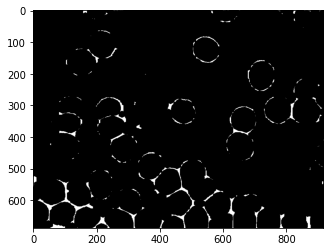

In [197]:
grad_kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))

grad = cv2.morphologyEx(img.copy(), cv2.MORPH_GRADIENT, grad_kernel)
grad = cv2.threshold(grad, 100.0, 255.0, cv2.THRESH_BINARY)[1]
grad = cv2.dilate(grad, kernel_5, iterations=3)
grad = cv2.erode(grad, kernel_5, iterations=5)

# grad = cv2.floodFill(grad.copy(), np.zeros((denoised.shape[0] + 2, denoised.shape[1] + 2), np.uint8), (0, 0), 255.0)[1]

contours, _ = cv2.findContours(grad, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
all_coins = len(contours)
print(all_coins)

plt.imshow(grad, cmap='gray')